In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#1. Load raw data
cp = pd.read_csv('marketing_campaign5.csv')


In [3]:
#2. Exploratory Data Analysis
cp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
cp.shape #good sample size

(2240, 29)

In [5]:
cp.columns #To clean column names form easier use

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
cp.columns = cp.columns.str.lower()
cp.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [7]:
cp.dtypes #Dt_Customer is currently an Object that should be converted to date format

id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

In [8]:
cp['dt_customer'] = pd.to_datetime(cp['dt_customer'], format=None)

In [9]:
cp['dt_customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: dt_customer, Length: 2240, dtype: datetime64[ns]

In [10]:
cp.isnull().sum() #To investigate missing values

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [11]:
cp[cp['income'].isnull()]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,...,6,0,0,0,0,0,0,3,11,0


In [12]:
cp['income'].min()

1730.0

In [13]:
cp['income'].max()

666666.0

In [14]:
cp['income'].mean()

52247.25135379061

In [15]:
cp['income'].value_counts()

7500.0     12
35860.0     4
18929.0     3
34176.0     3
67445.0     3
           ..
83033.0     1
29999.0     1
65819.0     1
54132.0     1
62335.0     1
Name: income, Length: 1974, dtype: int64

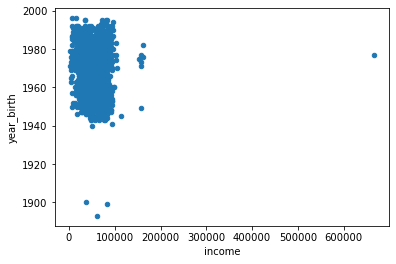

In [16]:
cp.plot.scatter(x="income", y="year_birth")
plt.show()

In [17]:
#Looks like we have outliers in 'income' group and some errors in year_birth to check

In [18]:
#Because we outlier in 'income' group, we'll replace missing income values using quantile
cp['income'].quantile(q=(0.1, 0.25, 0.5, 0.75, 0.9))

0.10    24117.5
0.25    35303.0
0.50    51381.5
0.75    68522.0
0.90    79844.0
Name: income, dtype: float64

In [19]:
#Replacing missing income value with quantile 50% value
cp['income'] = cp['income'].fillna(cp['income'].quantile(q=0.5))

In [20]:
cp['income'].isnull().sum()

0

In [21]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
year_birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
mntwines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
mntfruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
mntmeatproducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
mntfishproducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [22]:
#Year of birth min value is invalid so we'll investigate further
cp[cp['year_birth']<1940]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


In [23]:
#Since it's very usual to have a customer age 120 and more 
#we'll also replace these values with 50% quantile value
cp.year_birth.replace(to_replace=1900, value=1970, inplace=True)
cp.year_birth.replace(to_replace=1893, value=1970, inplace=True)
cp.year_birth.replace(to_replace=1899, value=1970, inplace=True)

In [24]:
cp['year_birth'].quantile(q=0.5)

1970.0

In [25]:
cp.dtypes

id                              int64
year_birth                      int64
education                      object
marital_status                 object
income                        float64
kidhome                         int64
teenhome                        int64
dt_customer            datetime64[ns]
recency                         int64
mntwines                        int64
mntfruits                       int64
mntmeatproducts                 int64
mntfishproducts                 int64
mntsweetproducts                int64
mntgoldprods                    int64
numdealspurchases               int64
numwebpurchases                 int64
numcatalogpurchases             int64
numstorepurchases               int64
numwebvisitsmonth               int64
acceptedcmp3                    int64
acceptedcmp4                    int64
acceptedcmp5                    int64
acceptedcmp1                    int64
acceptedcmp2                    int64
complain                        int64
z_costcontac

In [26]:
cp.corr().T

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
id,1.000000,0.003062,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
year_birth,0.003062,1.000000,-0.162232,0.233979,-0.363181,-0.019637,-0.162931,-0.013647,-0.030885,-0.042495,...,0.117375,0.060974,-0.064372,0.015404,-0.008259,-0.007671,-0.003949,NaN,NaN,0.018369
income,0.012996,-0.162232,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,...,-0.549785,-0.016064,0.182718,0.334893,0.274891,0.087581,-0.027187,NaN,NaN,0.132867
kidhome,0.002406,0.233979,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
teenhome,-0.002580,-0.363181,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
recency,-0.046524,-0.019637,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
mntwines,-0.022878,-0.162931,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
mntfruits,0.004600,-0.013647,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
mntmeatproducts,-0.004437,-0.030885,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
mntfishproducts,-0.024475,-0.042495,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [27]:
#To check columns with NaN value

In [28]:
cp['z_costcontact'].value_counts()

3    2240
Name: z_costcontact, dtype: int64

In [29]:
cp['z_revenue'].value_counts()

11    2240
Name: z_revenue, dtype: int64

In [30]:
#Column z_costcontact and z_revenue contain invalid value so we'll drop them both

cp = cp.drop(labels=['z_costcontact', 'z_revenue'], axis=1)

In [31]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
year_birth,2240.0,1968.903125,11.694144,1940.0,1959.00,1970.0,1977.00,1996.0
income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
mntwines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
mntfruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
mntmeatproducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
mntfishproducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [32]:
#Our dataset is now clean and ready for analysis
#We'll start from exploring some of these features

In [33]:
cp.corr()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
id,1.000000,0.003062,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,-0.021968
year_birth,0.003062,1.000000,-0.162232,0.233979,-0.363181,-0.019637,-0.162931,-0.013647,-0.030885,-0.042495,...,-0.125383,-0.139491,0.117375,0.060974,-0.064372,0.015404,-0.008259,-0.007671,-0.003949,0.018369
income,0.012996,-0.162232,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,...,0.586826,0.526600,-0.549785,-0.016064,0.182718,0.334893,0.274891,0.087581,-0.027187,0.132867
kidhome,0.002406,0.233979,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008
teenhome,-0.002580,-0.363181,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446
recency,-0.046524,-0.019637,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437
mntwines,-0.022878,-0.162931,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254
mntfruits,0.004600,-0.013647,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289
mntmeatproducts,-0.004437,-0.030885,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335
mntfishproducts,-0.024475,-0.042495,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331


In [34]:
#Number of amount spend on wines

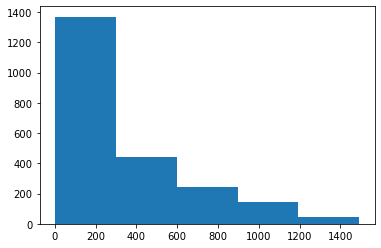

In [35]:
plt.hist(cp['mntwines'], bins=5)
plt.show()

In [36]:
ed = cp.groupby(by = ['education'])
ed.size().sort_values()

education
Basic           54
2n Cycle       203
Master         370
PhD            486
Graduation    1127
dtype: int64

In [37]:
cp.groupby(by=['education', 'mntwines']).size().sort_values()

education   mntwines
PhD         1493         1
Graduation  654          1
            658          1
            673          1
            674          1
                        ..
            4           18
            6           19
            2           20
            3           21
            5           24
Length: 1209, dtype: int64

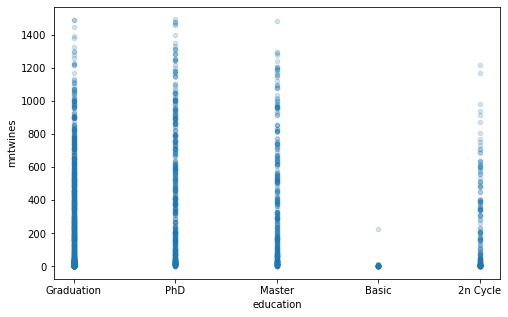

In [38]:
cp.plot.scatter('education', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

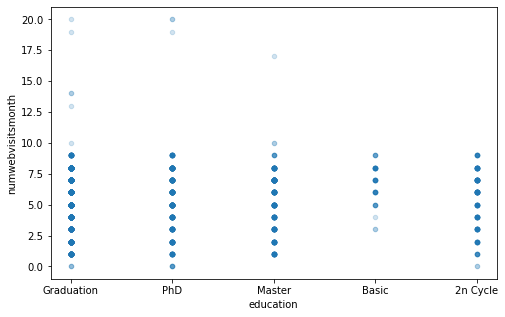

In [39]:
cp.plot.scatter('education', 'numwebvisitsmonth', alpha=0.2, figsize=(8,5))
plt.show()

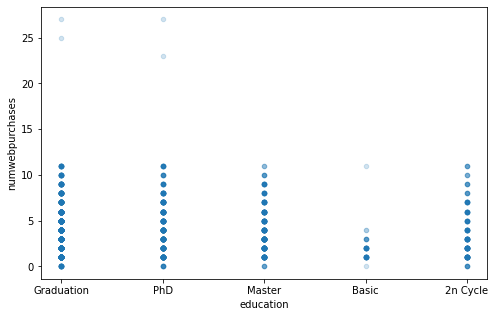

In [40]:
cp.plot.scatter('education', 'numwebpurchases', alpha=0.2, figsize=(8,5))
plt.show()

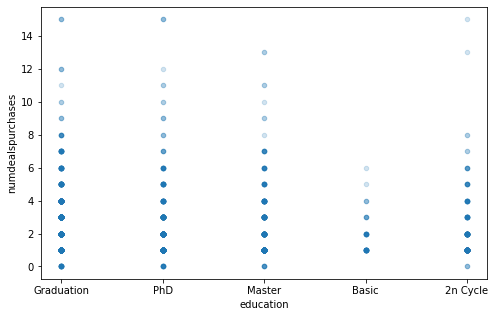

In [41]:
cp.plot.scatter('education', 'numdealspurchases', alpha=0.2, figsize=(8,5))
plt.show()

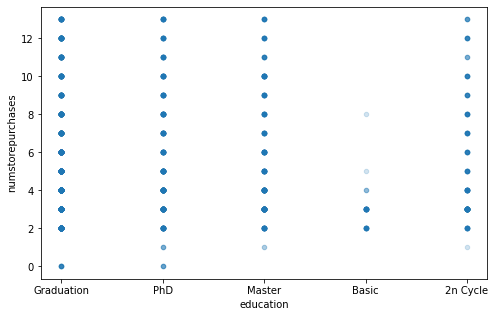

In [42]:
cp.plot.scatter('education', 'numstorepurchases', alpha=0.2, figsize=(8,5))
plt.show()

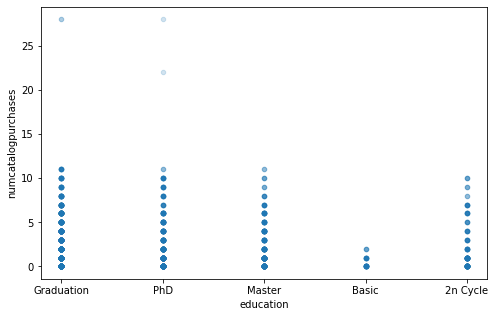

In [43]:
cp.plot.scatter('education', 'numcatalogpurchases', alpha=0.2, figsize=(8,5))
plt.show()

In [44]:
income = cp.groupby(by = ['income'])
income.size().sort_values()

income
1730.0      1
62000.0     1
61996.0     1
61923.0     1
61917.0     1
           ..
47025.0     3
18690.0     3
35860.0     4
7500.0     12
51381.5    24
Length: 1975, dtype: int64

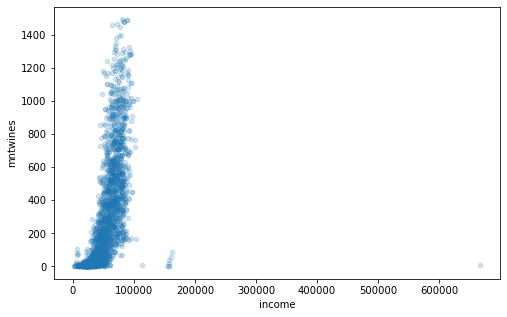

In [45]:
cp.plot.scatter('income', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

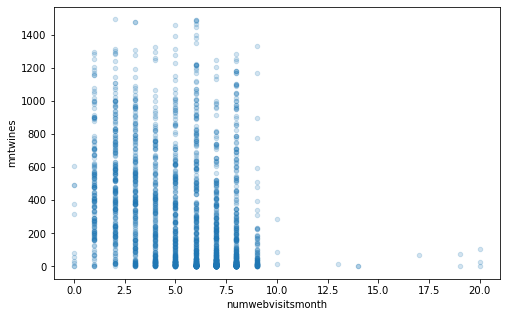

In [46]:
cp.plot.scatter('numwebvisitsmonth', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

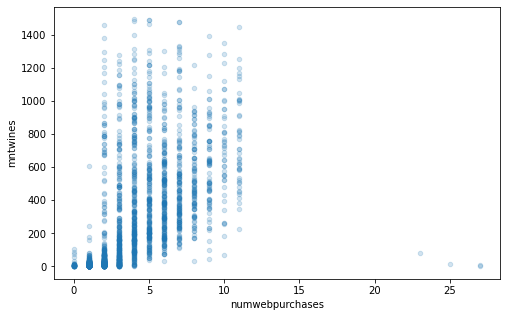

In [47]:
cp.plot.scatter('numwebpurchases', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

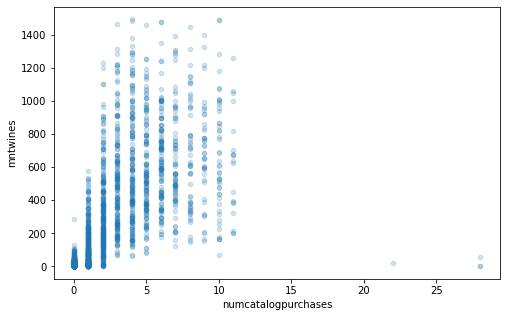

In [48]:
cp.plot.scatter('numcatalogpurchases', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

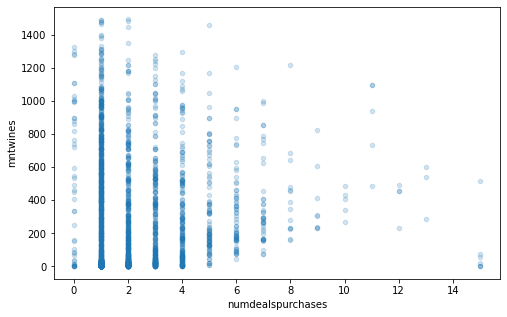

In [49]:
cp.plot.scatter('numdealspurchases', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

In [ ]:
#Checking on number of customers that accepted campaigns

In [50]:
cp[cp.acceptedcmp1 == 1].shape

(144, 27)

In [51]:
cp[cp.acceptedcmp2 == 1].shape

(30, 27)

In [52]:
cp[cp.acceptedcmp3 == 1].shape

(163, 27)

In [53]:
cp[cp.acceptedcmp4 == 1].shape

(167, 27)

In [54]:
cp[cp.acceptedcmp5 == 1].shape

(163, 27)

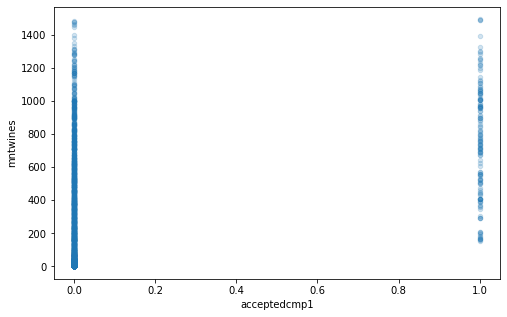

In [55]:
cp.plot.scatter('acceptedcmp1', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

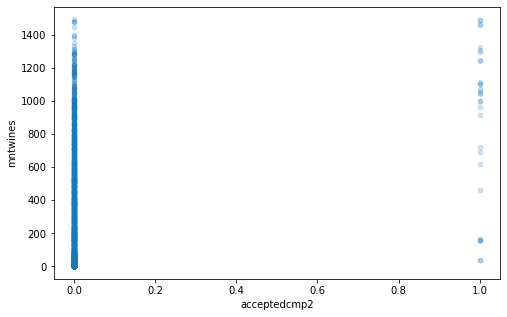

In [56]:
cp.plot.scatter('acceptedcmp2', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

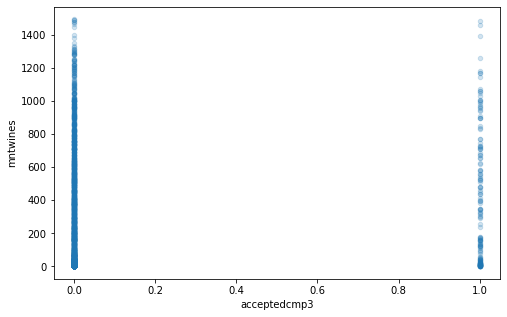

In [57]:
cp.plot.scatter('acceptedcmp3', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

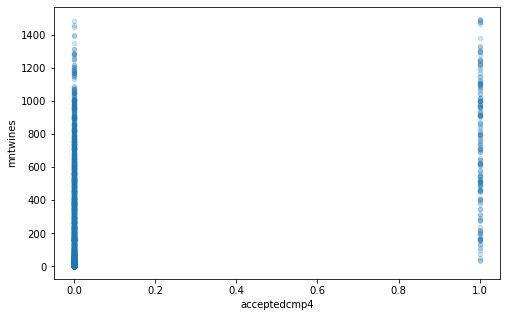

In [58]:
cp.plot.scatter('acceptedcmp4', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

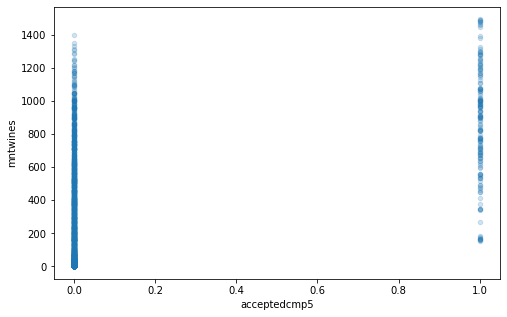

In [59]:
cp.plot.scatter('acceptedcmp5', 'mntwines', alpha=0.2, figsize=(8,5))
plt.show()

In [60]:
cp.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [61]:
cp.dt_customer.value_counts()

2012-08-31    12
2013-02-14    11
2012-12-09    11
2014-12-05    11
2014-05-22    10
              ..
2014-04-15     1
2013-03-25     1
2012-10-30     1
2014-03-02     1
2013-02-03     1
Name: dt_customer, Length: 663, dtype: int64

In [62]:
web_visit = cp.numwebvisitsmonth.sum()
web_visit

11909

In [63]:
web_purchase = cp.numwebpurchases.sum()
web_purchase

9150

In [64]:
number_customer = cp.id.count()
number_customer

2240

In [65]:
web_conversion_rate = (web_purchase / web_visit) * 100
web_conversion_rate

76.83264757746242

In [66]:
cp.response.value_counts()

0    1906
1     334
Name: response, dtype: int64

In [67]:
response1 = cp[cp.response == 1]
response1.shape

(334, 27)

In [68]:
response1.corr()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
id,1.000000,-0.029872,0.014276,-0.017943,-0.034443,-0.019390,-0.056004,0.033939,0.080064,0.024786,...,0.040814,0.014807,-0.079565,-0.056032,-0.038126,-0.020866,0.008508,-0.080758,0.028642,NaN
year_birth,-0.029872,1.000000,-0.085689,0.159318,-0.318753,-0.046607,-0.114173,0.053317,0.030120,-0.067293,...,-0.156326,-0.075944,-0.028066,0.102186,-0.061458,0.091877,0.046169,-0.041103,0.122407,NaN
income,0.014276,-0.085689,1.000000,-0.673260,-0.157522,0.196028,0.703659,0.494107,0.723174,0.534172,...,0.708973,0.620948,-0.753030,-0.158561,0.306722,0.605461,0.500251,0.149180,-0.027213,NaN
kidhome,-0.017943,0.159318,-0.673260,1.000000,0.139881,-0.163673,-0.574058,-0.440725,-0.561215,-0.454038,...,-0.618217,-0.543675,0.579177,0.098147,-0.224103,-0.377382,-0.332490,-0.177020,0.128865,NaN
teenhome,-0.034443,-0.318753,-0.157522,0.139881,1.000000,0.049336,-0.063498,-0.309853,-0.340934,-0.268998,...,-0.168847,-0.104357,0.372495,0.007008,0.047985,-0.260117,-0.187963,0.022883,-0.059093,NaN
recency,-0.019390,-0.046607,0.196028,-0.163673,0.049336,1.000000,0.212379,0.082055,0.137742,0.122559,...,0.201863,0.137415,-0.104458,0.031528,0.161505,0.135829,0.076717,0.095647,0.021660,NaN
mntwines,-0.056004,-0.114173,0.703659,-0.574058,-0.063498,0.212379,1.000000,0.319576,0.488350,0.315027,...,0.559019,0.528660,-0.444286,-0.082415,0.367662,0.550635,0.405024,0.236670,-0.058039,NaN
mntfruits,0.033939,0.053317,0.494107,-0.440725,-0.309853,0.082055,0.319576,1.000000,0.547880,0.546127,...,0.487160,0.346187,-0.507594,-0.046898,-0.026871,0.271724,0.215194,-0.039222,-0.054885,NaN
mntmeatproducts,0.080064,0.030120,0.723174,-0.561215,-0.340934,0.137742,0.488350,0.547880,1.000000,0.520343,...,0.567611,0.463395,-0.697762,-0.112643,0.062852,0.404592,0.312264,-0.008196,-0.016734,NaN
mntfishproducts,0.024786,-0.067293,0.534172,-0.454038,-0.268998,0.122559,0.315027,0.546127,0.520343,1.000000,...,0.571756,0.334386,-0.557196,-0.093218,-0.032685,0.228339,0.307085,-0.037801,-0.054028,NaN


In [69]:
response0 = cp[cp.response == 0]
response0.shape

(1906, 27)

In [70]:
response0.corr()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
id,1.000000,0.009509,0.016342,0.003460,-0.001715,-0.057261,-0.009259,0.002032,-0.017938,-0.031524,...,-0.005993,-0.018667,0.005485,-0.025336,-0.017954,0.007781,-0.027325,0.023771,0.034714,NaN
year_birth,0.009509,1.000000,-0.180364,0.249691,-0.373345,-0.010828,-0.189547,-0.031792,-0.053904,-0.039932,...,-0.127815,-0.151873,0.146650,0.044821,-0.072856,-0.025332,-0.042210,0.004941,-0.027036,NaN
income,0.016342,-0.180364,1.000000,-0.383206,0.069145,-0.004113,0.544665,0.407004,0.541293,0.411337,...,0.554476,0.512118,-0.520737,-0.021164,0.130449,0.238044,0.184435,0.042279,-0.027205,NaN
kidhome,0.003460,0.249691,-0.383206,1.000000,-0.075932,0.016501,-0.484686,-0.355258,-0.411312,-0.371360,...,-0.479350,-0.491959,0.428227,0.019711,-0.137315,-0.146539,-0.111659,-0.034954,0.026683,NaN
teenhome,-0.001715,-0.373345,0.069145,-0.075932,1.000000,-0.024765,0.069705,-0.133238,-0.214500,-0.176940,...,-0.064069,0.081540,0.096216,-0.007249,0.076500,-0.129212,-0.080515,0.007795,0.012469,NaN
recency,-0.057261,-0.010828,-0.004113,0.016501,-0.024765,1.000000,0.035343,0.008761,0.059167,0.004268,...,0.047615,-0.011713,-0.007868,0.015225,0.027419,0.051933,0.032500,0.007095,0.011746,NaN
mntwines,-0.009259,-0.189547,0.544665,-0.484686,0.069705,0.035343,1.000000,0.389833,0.551705,0.408421,...,0.632888,0.691521,-0.302438,0.039893,0.338290,0.378516,0.260703,0.147947,-0.035968,NaN
mntfruits,0.002032,-0.031792,0.407004,-0.355258,-0.133238,0.008761,0.389833,1.000000,0.529477,0.599803,...,0.473194,0.485940,-0.402261,-0.006132,-0.007273,0.158225,0.154747,-0.033128,0.005271,NaN
mntmeatproducts,-0.017938,-0.053904,0.541293,-0.411312,-0.214500,0.059167,0.551705,0.529477,1.000000,0.575086,...,0.751046,0.496430,-0.520811,-0.011720,0.064663,0.292206,0.240752,0.012800,-0.025722,NaN
mntfishproducts,-0.031524,-0.039932,0.411337,-0.371360,-0.176940,0.004268,0.408421,0.599803,0.575086,1.000000,...,0.515717,0.484349,-0.424847,-0.003744,0.007400,0.161565,0.226985,-0.006018,-0.014331,NaN


In [71]:
response0[response0.acceptedcmp1 == 1].shape

(65, 27)

In [72]:
response0[response0.acceptedcmp2 == 1].shape

(10, 27)

In [73]:
response0[response0.acceptedcmp3 == 1].shape

(86, 27)

In [77]:
response0[response0.acceptedcmp4 == 1].shape

(105, 27)

In [78]:
response0[response0.acceptedcmp5 == 1].shape

(71, 27)